<h1>Import Libraries</h1>


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix

<h1>Load Datasets</h1>

The datasets used in this project are from Kaggle: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction/data 

In [55]:
application_data = pd.read_csv("../dataset/application_record.csv")
credit_record = pd.read_csv("../dataset/credit_record.csv")

In [56]:
application_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1


In [57]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


<h1>Featured Engineering</h1>

<h3>Check Missing Values</h3>

In [58]:
# Check for missing values in the application dataset
print("Missing values in application data:")
print(application_data.isnull().sum())


Missing values in application data:
ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64


In [59]:
# Check for missing values in the credit dataset
print("Missing values in credit data:")
print(credit_record.isnull().sum())

Missing values in credit data:
ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


<h3>Application Data</h3>

In [60]:
application_data.rename(columns={"CODE_GENDER": "GENDER",
                                  "FLAG_OWN_CAR": "CAR",
                                  "FLAG_OWN_REALTY": "REAL_STATE",
                                  "CNT_CHILDREN": "CHILDREN",
                                  "AMT_INCOME_TOTAL": "INCOME",
                                  "NAME_INCOME_TYPE": "INCOME_TYPE",
                                  "NAME_EDUCATION_TYPE": "EDUCATION",
                                  "NAME_FAMILY_STATUS": "MARTIAL_STATUS",
                                  "NAME_HOUSING_TYPE": "HOUSING_TYPE",
                                  "DAYS_BIRTH": "AGE",
                                  "DAYS_EMPLOYED": "YEARS EMPLOYED",
                                  "FLAG_MOBILE": "MOBILE PHONE",
                                  "FLAG_WORK_PHONE": "WORK PHONE",
                                  "FLAG_PHONE": "PHONE",
                                  "FLAG_EMAIL": "EMAIL",
                                  "CNT_FAM_MEMBERS": "FAMILY SIZE"}, inplace="True")

In [61]:
application_data["AGE"] = application_data["AGE"] / -365
application_data["YEARS EMPLOYED"] = application_data["YEARS EMPLOYED"] / -365

In [62]:
application_data.head()

,ID,GENDER,CAR,REAL_STATE,CHILDREN,INCOME,INCOME_TYPE,EDUCATION,MARTIAL_STATUS,HOUSING_TYPE,AGE,YEARS EMPLOYED,FLAG_MOBIL,WORK PHONE,PHONE,EMAIL,OCCUPATION_TYPE,FAMILY SIZE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1


In [63]:
application_data.describe()

,ID,CHILDREN,INCOME,AGE,YEARS EMPLOYED,FLAG_MOBIL,WORK PHONE,PHONE,EMAIL,FAMILY SIZE
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,43.829876,-165.927878,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,11.465836,380.185752,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,20.517808,-1000.665753,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,34.284932,1.016438,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,42.821918,4.019178,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,53.378082,8.501370,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,69.043836,48.030137,1.0,1.000000,1.000000,1.000000,20.000000


<h3>Credit Score Dataset</h3>

In [64]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


<h3> Analysis </h3>

In [65]:
merged_data = pd.merge(application_data, credit_record, on="ID")

In [66]:
merged_data["OCCUPATION_TYPE"] = merged_data["OCCUPATION_TYPE"].fillna("Unknown")
merged_data["MONTHS_BALANCE"] = (merged_data["MONTHS_BALANCE"] * -1).astype(int)

In [67]:
merged_data.head()

,ID,GENDER,CAR,REAL_STATE,CHILDREN,INCOME,INCOME_TYPE,EDUCATION,MARTIAL_STATUS,HOUSING_TYPE,AGE,YEARS EMPLOYED,FLAG_MOBIL,WORK PHONE,PHONE,EMAIL,OCCUPATION_TYPE,FAMILY SIZE,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Unknown,2,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Unknown,2,1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Unknown,2,2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Unknown,2,3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Unknown,2,4,C


In [68]:
print('Application Record data shape: ', application_data.shape)
print('Credit Record data shape: ', credit_record.shape)
print('Merged data shape: ', merged_data.shape)

Application Record data shape:  (438557, 18)
Credit Record data shape:  (1048575, 3)
Merged data shape:  (777715, 20)


In [69]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               777715 non-null  int64  
 1   GENDER           777715 non-null  object 
 2   CAR              777715 non-null  object 
 3   REAL_STATE       777715 non-null  object 
 4   CHILDREN         777715 non-null  int64  
 5   INCOME           777715 non-null  float64
 6   INCOME_TYPE      777715 non-null  object 
 7   EDUCATION        777715 non-null  object 
 8   MARTIAL_STATUS   777715 non-null  object 
 9   HOUSING_TYPE     777715 non-null  object 
 10  AGE              777715 non-null  float64
 11  YEARS EMPLOYED   777715 non-null  float64
 12  FLAG_MOBIL       777715 non-null  int64  
 13  WORK PHONE       777715 non-null  int64  
 14  PHONE            777715 non-null  int64  
 15  EMAIL            777715 non-null  int64  
 16  OCCUPATION_TYPE  777715 non-null  obje

<h2>Visualize the Data</h2>

In [70]:
status_data = merged_data["STATUS"].value_counts().reset_index()
status_data

,STATUS,count
0,C,329536
1,0,290654
2,X,145950
3,1,8747
4,5,1527
5,2,801
6,3,286
7,4,214


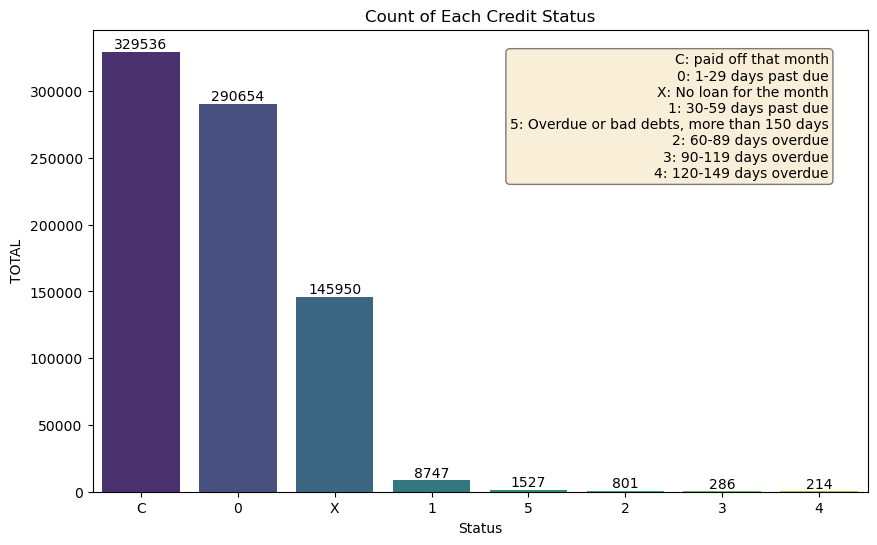

In [71]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=status_data["STATUS"], y=status_data["count"], data=status_data, palette='viridis')

plt.xlabel('Status')
plt.ylabel('TOTAL')
plt.title('Count of Each Credit Status')

for containers in barplot.containers:
    plt.bar_label(containers,)

textstr = '\n'.join([
    'C: paid off that month',
    '0: 1-29 days past due',
    'X: No loan for the month',
    '1: 30-59 days past due',
    '5: Overdue or bad debts, more than 150 days',
    '2: 60-89 days overdue',
    '3: 90-119 days overdue',
    '4: 120-149 days overdue' 
])

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.gca().text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', bbox=props, horizontalalignment='right')

plt.show()

In [72]:
merged_data["OCCUPATION_TYPE"].value_counts().reset_index()

,OCCUPATION_TYPE,count
0,Unknown,240048
1,Laborers,131572
2,Core staff,77112
3,Sales staff,70362
4,Managers,67738
5,Drivers,47678
6,High skill tech staff,31768
7,Accountants,27223
8,Medicine staff,26691
9,Cooking staff,13416


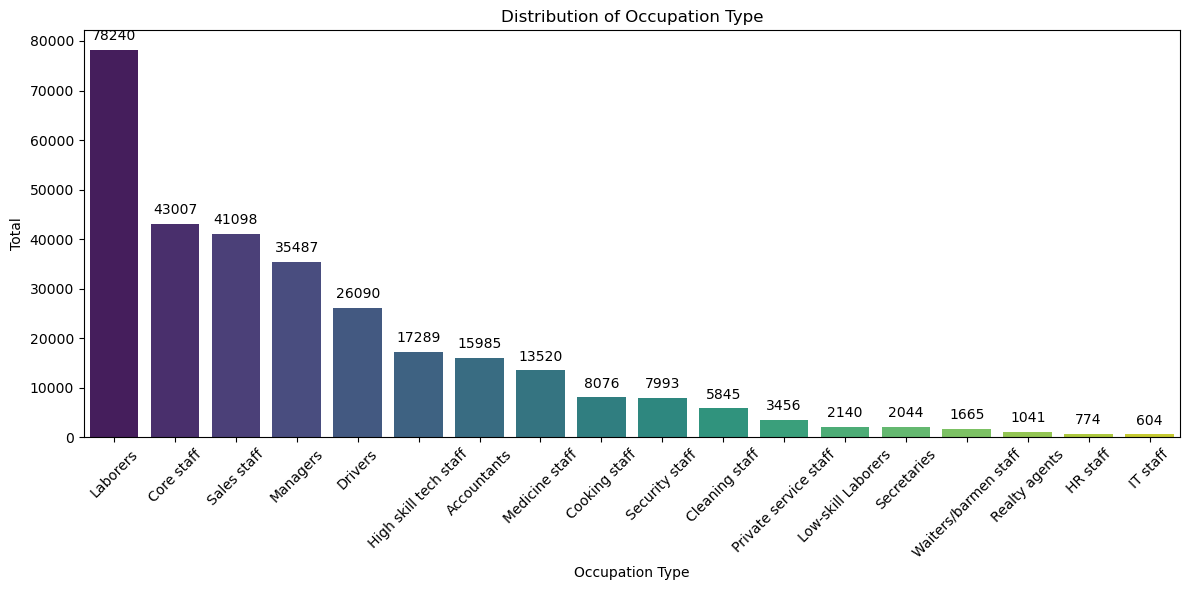

In [73]:
plt.figure(figsize=(12, 6))
occupation_plot = sns.countplot(x='OCCUPATION_TYPE', order=application_data['OCCUPATION_TYPE'].value_counts().index, data=application_data, palette='viridis')

plt.xlabel('Occupation Type')
plt.ylabel('Total')
plt.title('Distribution of Occupation Type')
plt.xticks(rotation=45)

# Add labels to the top of bars
for p in occupation_plot.patches:
    occupation_plot.annotate(format(p.get_height(), '.0f'), 
                                (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha = 'center', va = 'center', 
                                xytext = (0, 10), 
                                textcoords = 'offset points')

plt.tight_layout()
plt.show()


c:\Users\52871\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


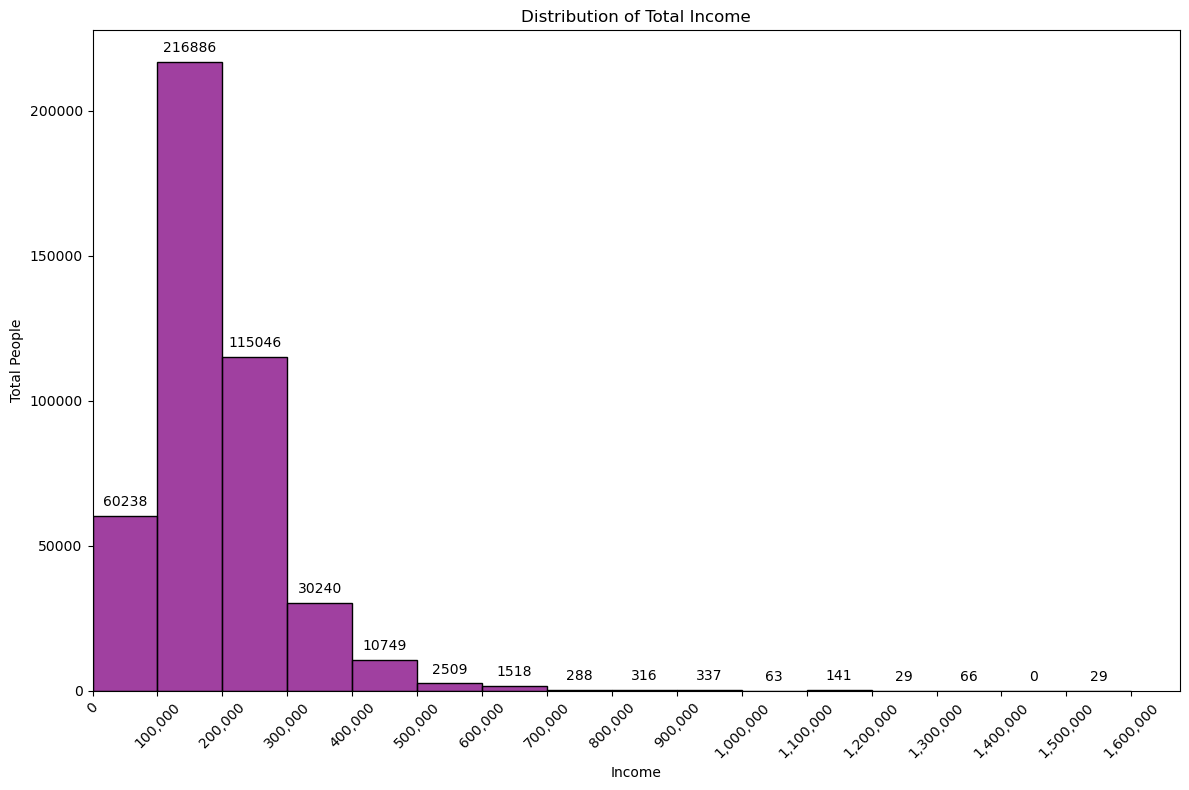

In [74]:
bucket_size = 100000
max_income = merged_data["INCOME"].max()
bins = range(0, int(max_income + bucket_size), bucket_size)


plt.figure(figsize=(12, 8))
income_plot = sns.histplot(x='INCOME', data= application_data, bins=bins, color="purple", kde=False)

plt.xlabel('Income')
plt.ylabel('Total People')
plt.title('Distribution of Total Income')


x_ticks = [f'{i:,}' for i in bins]
plt.xticks(ticks=bins, labels=x_ticks, rotation=45)

plt.xlim(0, max_income + bucket_size)

for p in income_plot.patches:
    income_plot.annotate(format(p.get_height(), '.0f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='center', 
                            xytext=(0, 10), 
                            textcoords='offset points')
    
plt.tight_layout()
plt.show()

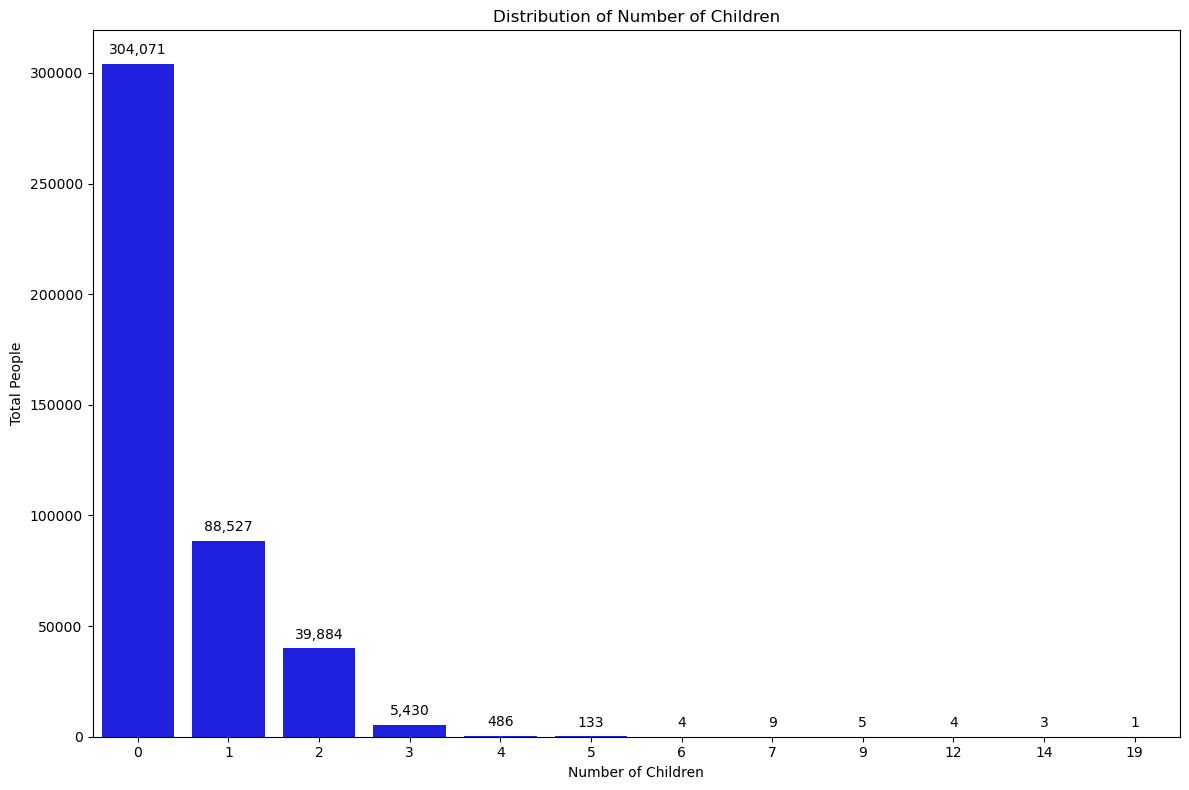

In [75]:
plt.figure(figsize=(12, 8))
children_plot = sns.countplot(x='CHILDREN', data= application_data, color='blue')

plt.xlabel('Number of Children')
plt.ylabel('Total People')
plt.title('Distribution of Number of Children')

for p in children_plot.patches:
    height = int(p.get_height())
    if height > 0:
        children_plot.annotate(format(height, ',d'), 
                               (p.get_x() + p.get_width() / 2., height), 
                               ha='center', va='center', 
                               xytext=(0, 10), 
                               textcoords='offset points')

plt.tight_layout()
plt.show()


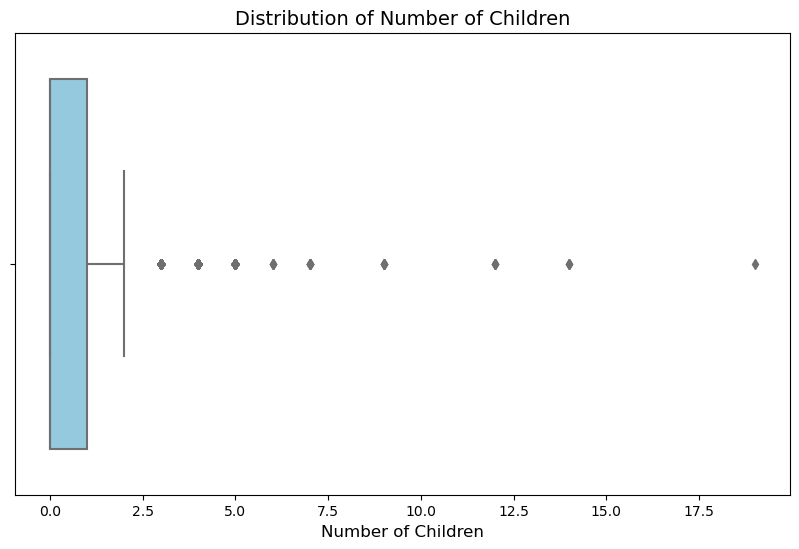

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=application_data["CHILDREN"], color="skyblue")

plt.title('Distribution of Number of Children', fontsize=14)
plt.xlabel('Number of Children', fontsize=12)

plt.show()

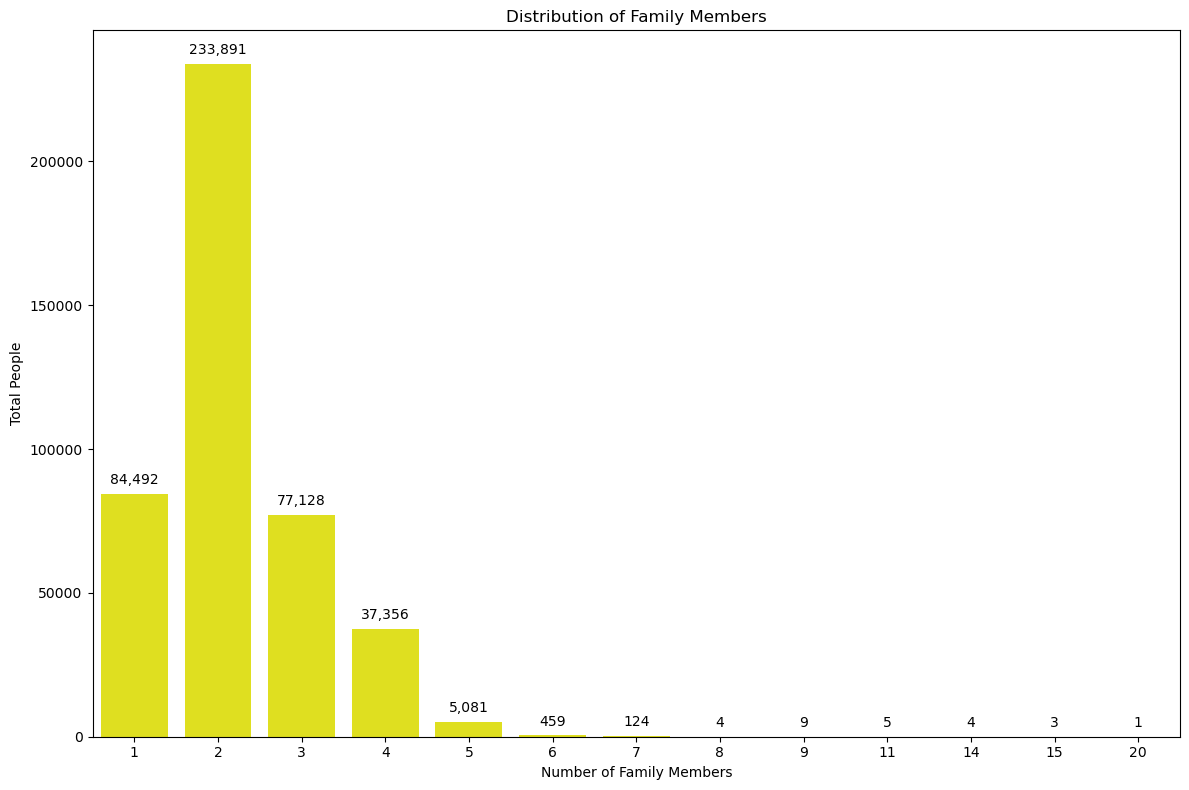

In [77]:
plt.figure(figsize=(12, 8))
children_plot = sns.countplot(x='FAMILY SIZE', data=application_data, color='yellow')

plt.xlabel('Number of Family Members')
plt.ylabel('Total People')
plt.title('Distribution of Family Members')

for p in children_plot.patches:
    height = int(p.get_height())
    if height > 0:
        children_plot.annotate(format(height, ',d'), 
                               (p.get_x() + p.get_width() / 2., height), 
                               ha='center', va='center', 
                               xytext=(0, 10), 
                               textcoords='offset points')

plt.tight_layout()
plt.show()

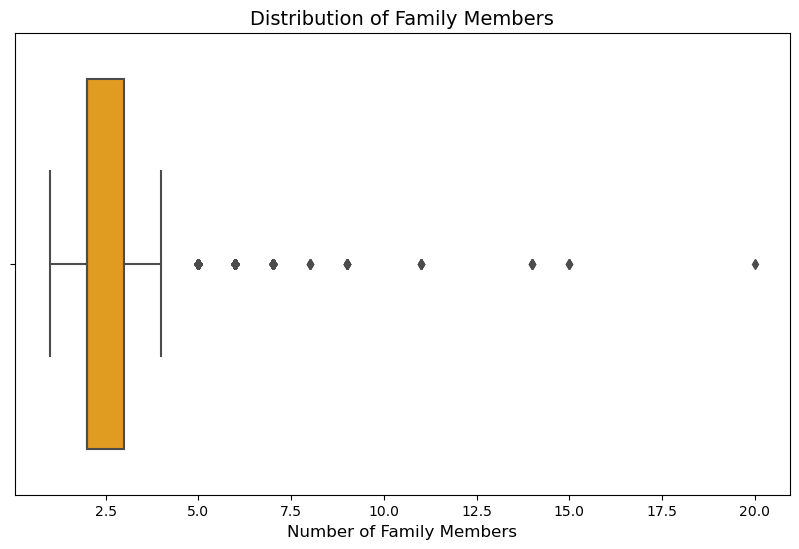

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=application_data["FAMILY SIZE"], color="orange")

plt.title('Distribution of Family Members', fontsize=14)
plt.xlabel('Number of Family Members', fontsize=12)

plt.show()

c:\Users\52871\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


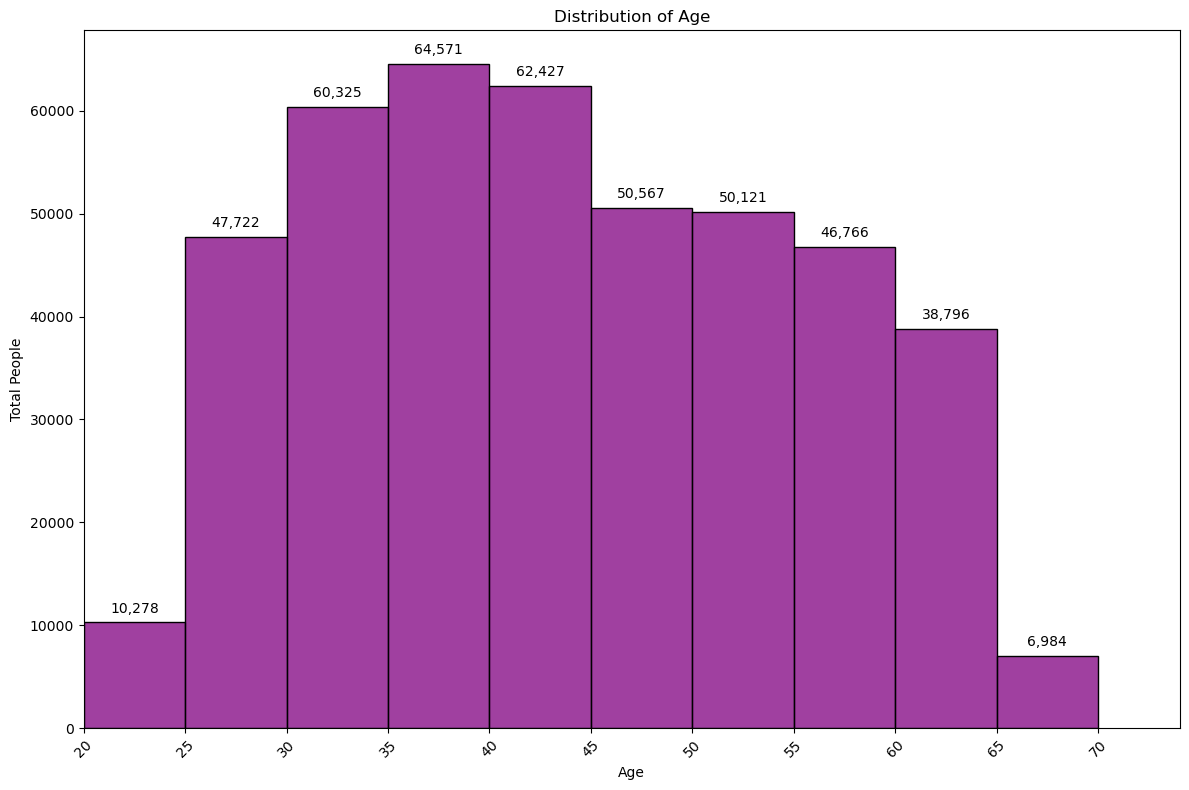

In [79]:
bucket_size = 5
min_age = 20
max_age = application_data["AGE"].max()
bins = range(min_age, int(max_age + bucket_size), bucket_size)

plt.figure(figsize=(12, 8))
age_plot = sns.histplot(x='AGE', data = application_data, bins=bins, kde=False, color='purple')

plt.xlabel('Age')
plt.ylabel('Total People')
plt.title("Distribution of Age")

x_ticks = [f'{i:,}' for i in bins]  
plt.xticks(ticks=bins, labels=x_ticks, rotation=45)

plt.xlim(min_age, max_age + bucket_size)

# Add labels on top of bars
for p in age_plot.patches:
    height = int(p.get_height())
    if height > 0:
        age_plot.annotate(format(height, ',d'), 
                          (p.get_x() + p.get_width() / 2., height), 
                          ha='center', va='center', 
                          xytext=(0, 10), 
                          textcoords='offset points')

plt.tight_layout()
plt.show()


c:\Users\52871\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


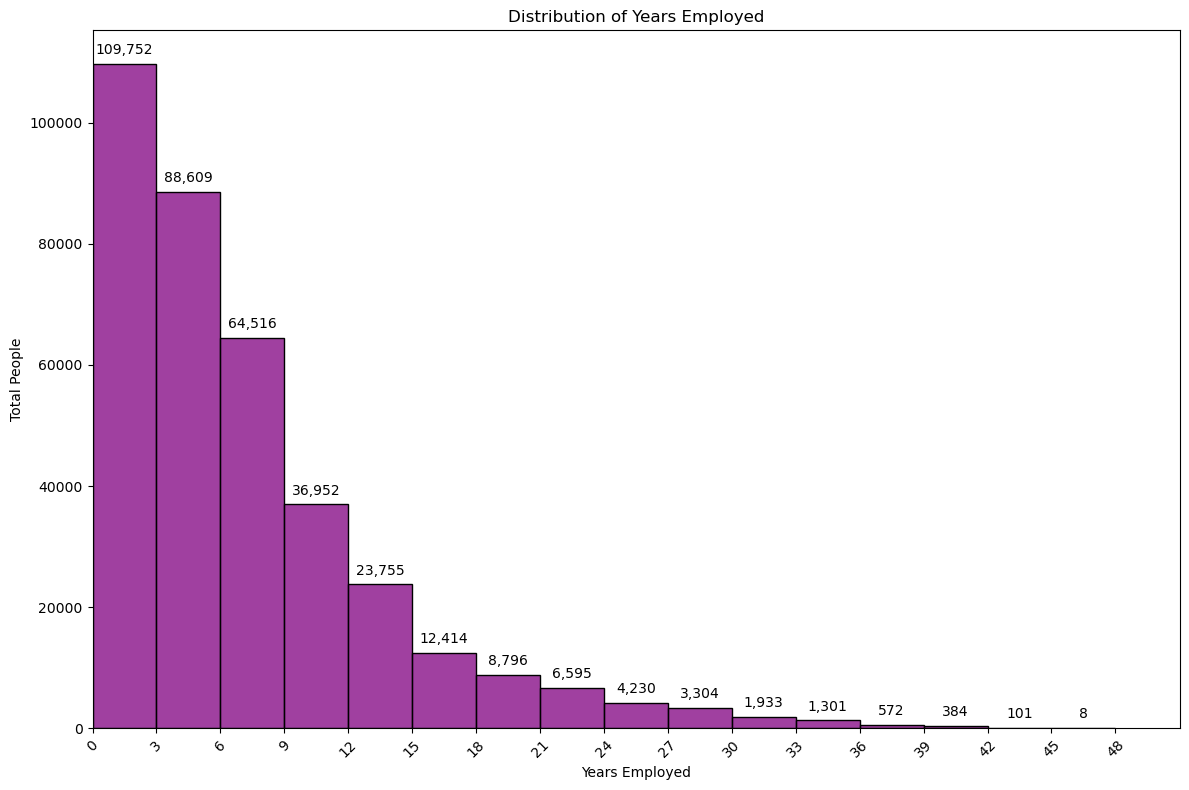

In [80]:
bucket_size = 3
max_years_employed = application_data["YEARS EMPLOYED"].max()
bins = range(0, int(max_years_employed + bucket_size), bucket_size)

plt.figure(figsize=(12, 8))
years_employed_plot = sns.histplot(x='YEARS EMPLOYED', data= application_data, bins=bins, kde=False, color='purple')

plt.xlabel('Years Employed')
plt.ylabel('Total People')
plt.title('Distribution of Years Employed')


x_ticks = [f'{i:,}' for i in bins]
plt.xticks(ticks=bins, labels=x_ticks, rotation=45)

plt.xlim(0, max_years_employed + bucket_size)

for p in years_employed_plot.patches:
    height = int(p.get_height())
    if height > 0:
        years_employed_plot.annotate(format(height, ',d'), 
                                     (p.get_x() + p.get_width() / 2., height), 
                                     ha='center', va='center', 
                                     xytext=(0, 10), 
                                     textcoords='offset points')

plt.tight_layout()
plt.show()

c:\Users\52871\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


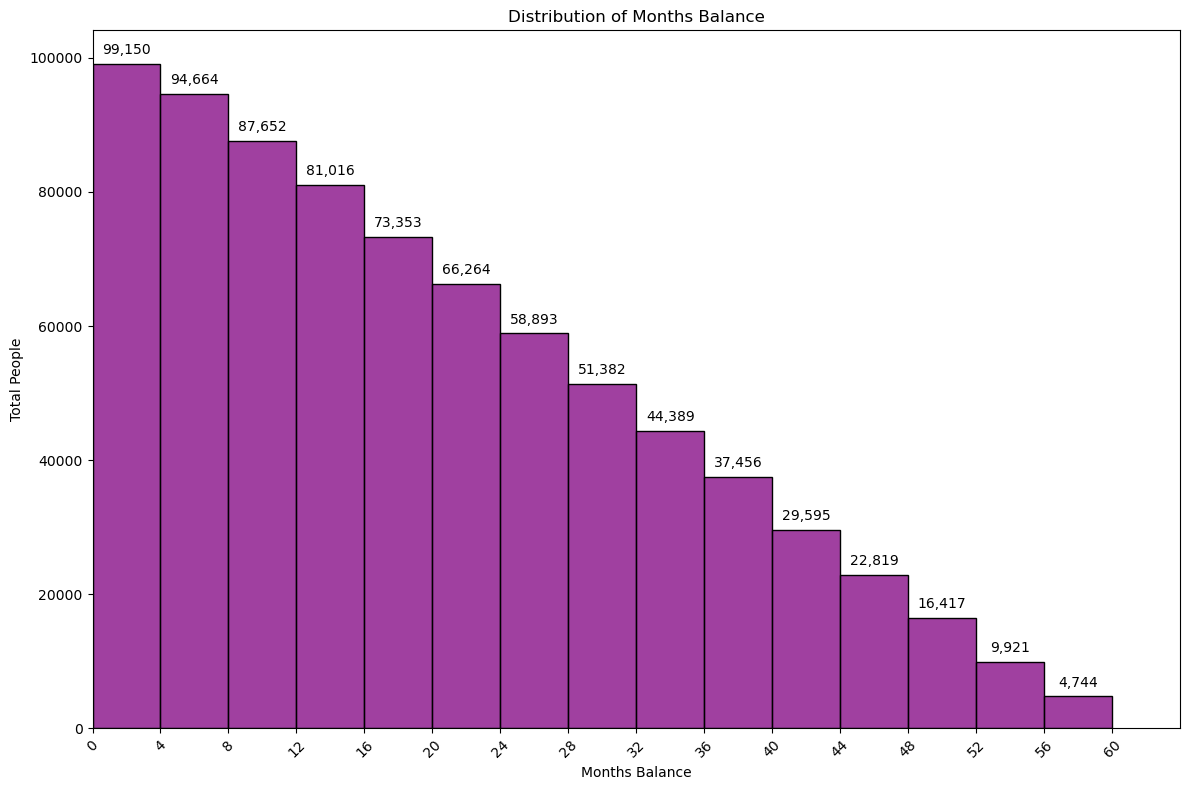

In [81]:
bucket_size = 4
min_months_balance = merged_data["MONTHS_BALANCE"].min()
max_months_balance = merged_data["MONTHS_BALANCE"].max()
bins = range(min_months_balance, int(max_months_balance + bucket_size), bucket_size)

plt.figure(figsize=(12, 8))
months_balance_plot = sns.histplot(x='MONTHS_BALANCE', data=merged_data, bins=bins, kde=False, color='purple')

plt.xlabel('Months Balance')
plt.ylabel('Total People')
plt.title('Distribution of Months Balance')

x_ticks = [f'{i:,}' for i in bins]
plt.xticks(ticks=bins, labels=x_ticks, rotation=45)


plt.xlim(min_months_balance, max_months_balance + bucket_size)

for p in months_balance_plot.patches:
    height = int(p.get_height())
    if height > 0:
        months_balance_plot.annotate(format(height, ',d'), 
                                     (p.get_x() + p.get_width() / 2., height), 
                                     ha='center', va='center', 
                                     xytext=(0, 10), 
                                     textcoords='offset points')

plt.tight_layout()
plt.show()


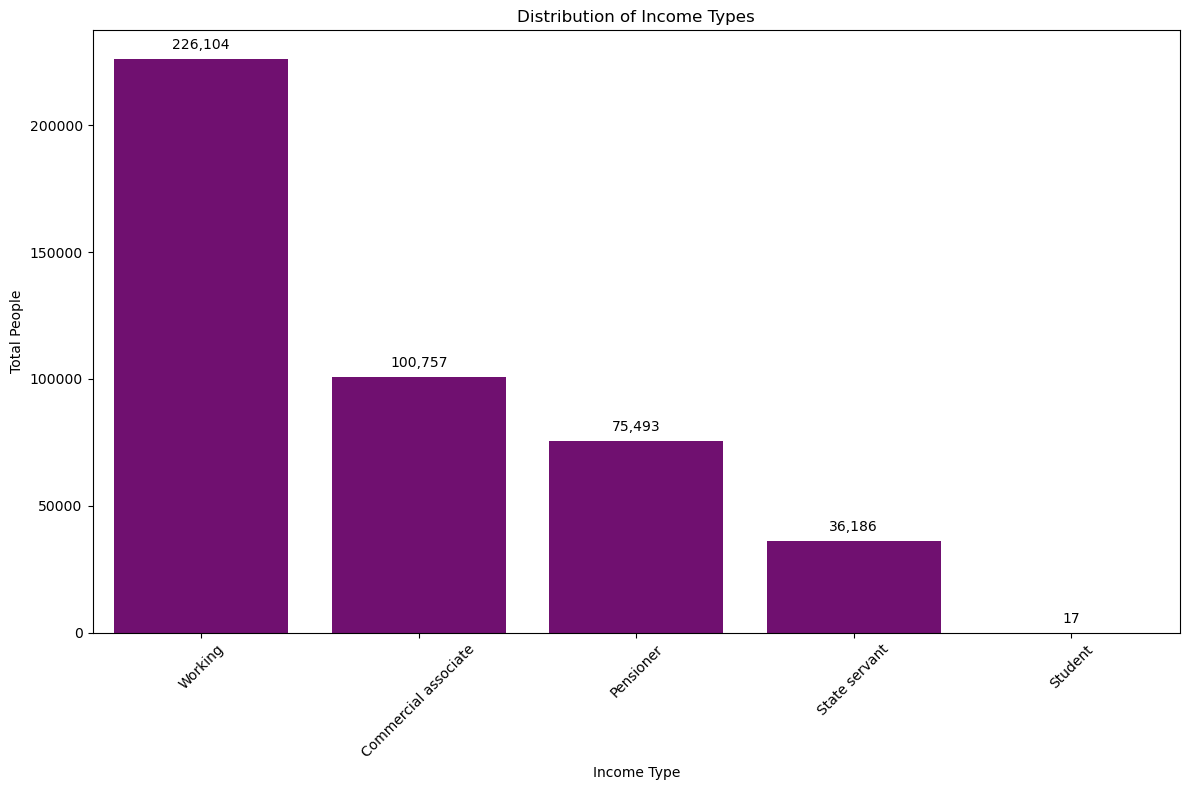

In [82]:
plt.figure(figsize=(12, 8))
income_type_plot = sns.countplot(x='INCOME_TYPE', data=application_data, color='purple')

plt.xlabel('Income Type')
plt.ylabel('Total People')
plt.title('Distribution of Income Types')
plt.xticks(rotation=45)

for p in income_type_plot.patches:
    height = int(p.get_height())
    if height > 0:
        income_type_plot.annotate(format(height, ',d'), 
                                  (p.get_x() + p.get_width() / 2., height), 
                                  ha='center', va='center', 
                                  xytext=(0, 10), 
                                  textcoords='offset points')

plt.tight_layout()
plt.show()

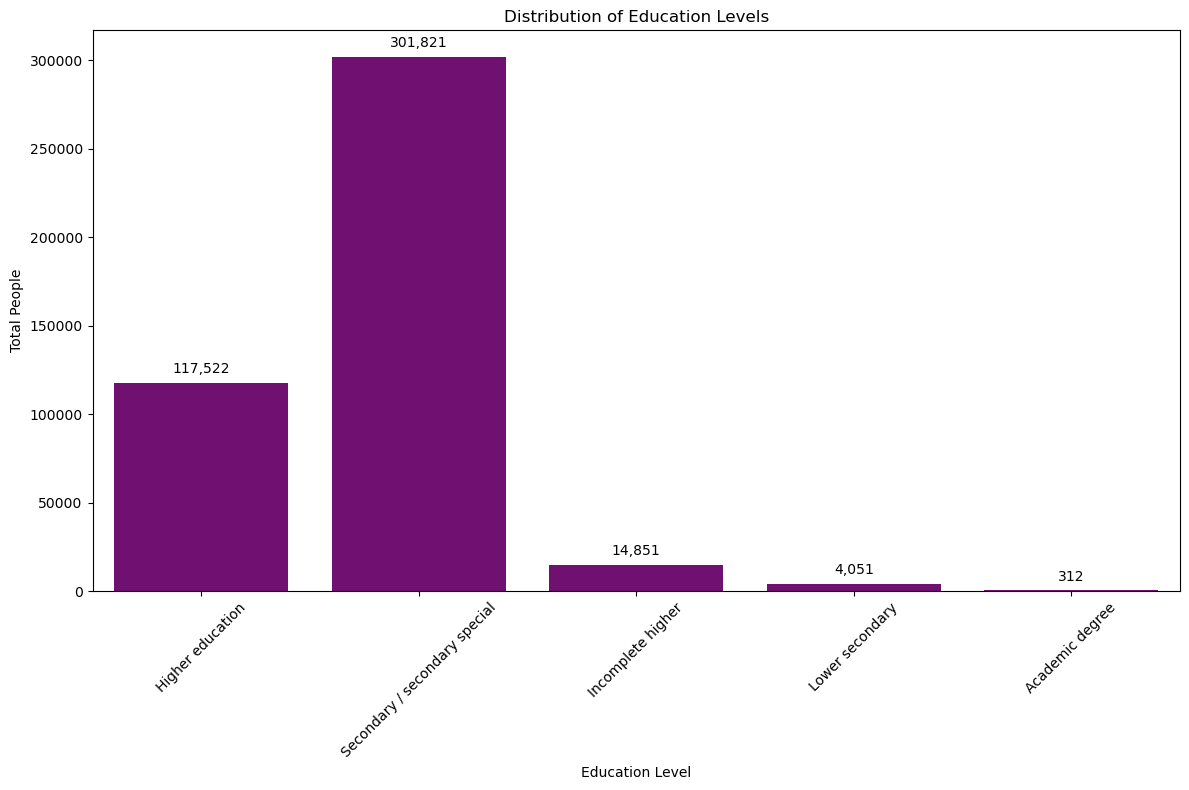

In [83]:
plt.figure(figsize=(12, 8))
education_plot = sns.countplot(x='EDUCATION', data= application_data, color='purple')

plt.xlabel('Education Level')
plt.ylabel('Total People')
plt.title('Distribution of Education Levels')
plt.xticks(rotation=45)

for p in education_plot.patches:
    height = int(p.get_height())
    if height > 0:
        education_plot.annotate(format(height, ',d'), 
                                (p.get_x() + p.get_width() / 2., height), 
                                ha='center', va='center', 
                                xytext=(0, 10), 
                                textcoords='offset points')

plt.tight_layout()
plt.show()

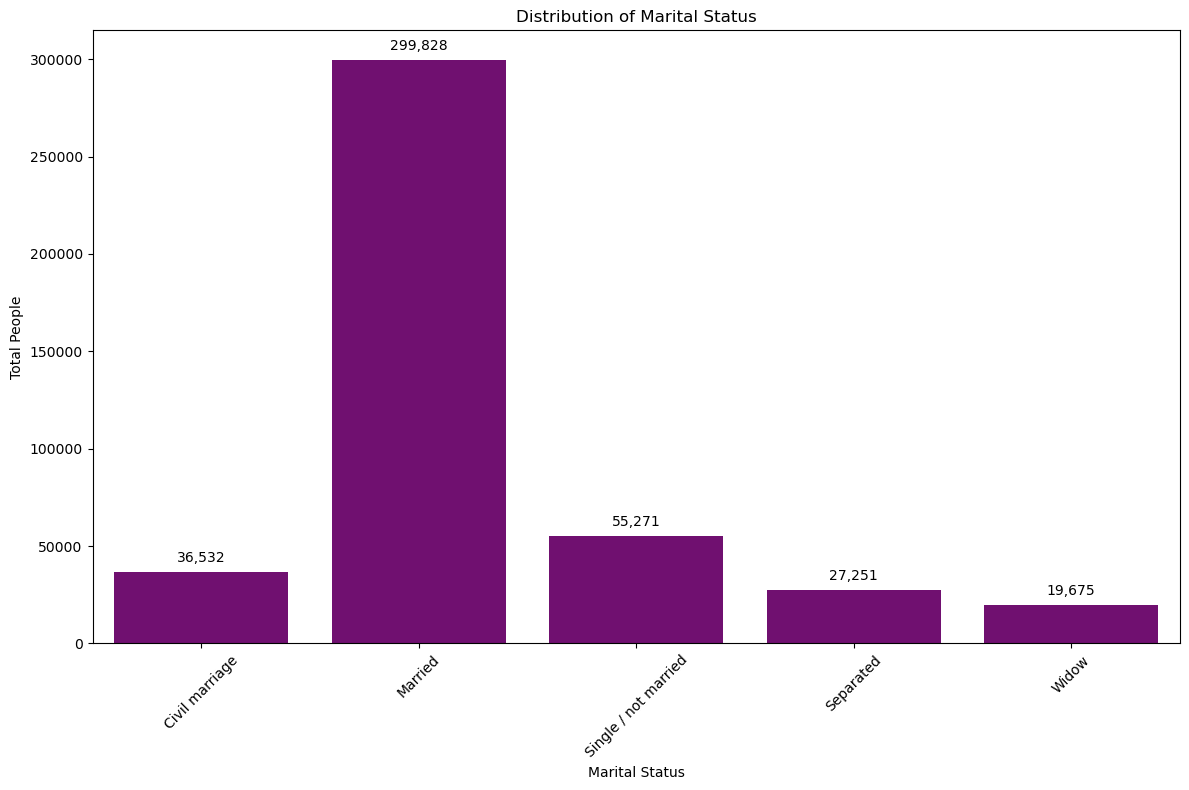

In [84]:
plt.figure(figsize=(12, 8))
marital_status_plot = sns.countplot(x='MARTIAL_STATUS', data= application_data, color='purple')

plt.xlabel('Marital Status')
plt.ylabel('Total People')
plt.title('Distribution of Marital Status')
plt.xticks(rotation=45)

for p in marital_status_plot.patches:
    height = int(p.get_height())
    if height > 0:
        marital_status_plot.annotate(format(height, ',d'), 
                                     (p.get_x() + p.get_width() / 2., height), 
                                     ha='center', va='center', 
                                     xytext=(0, 10), 
                                     textcoords='offset points')

plt.tight_layout()
plt.show()

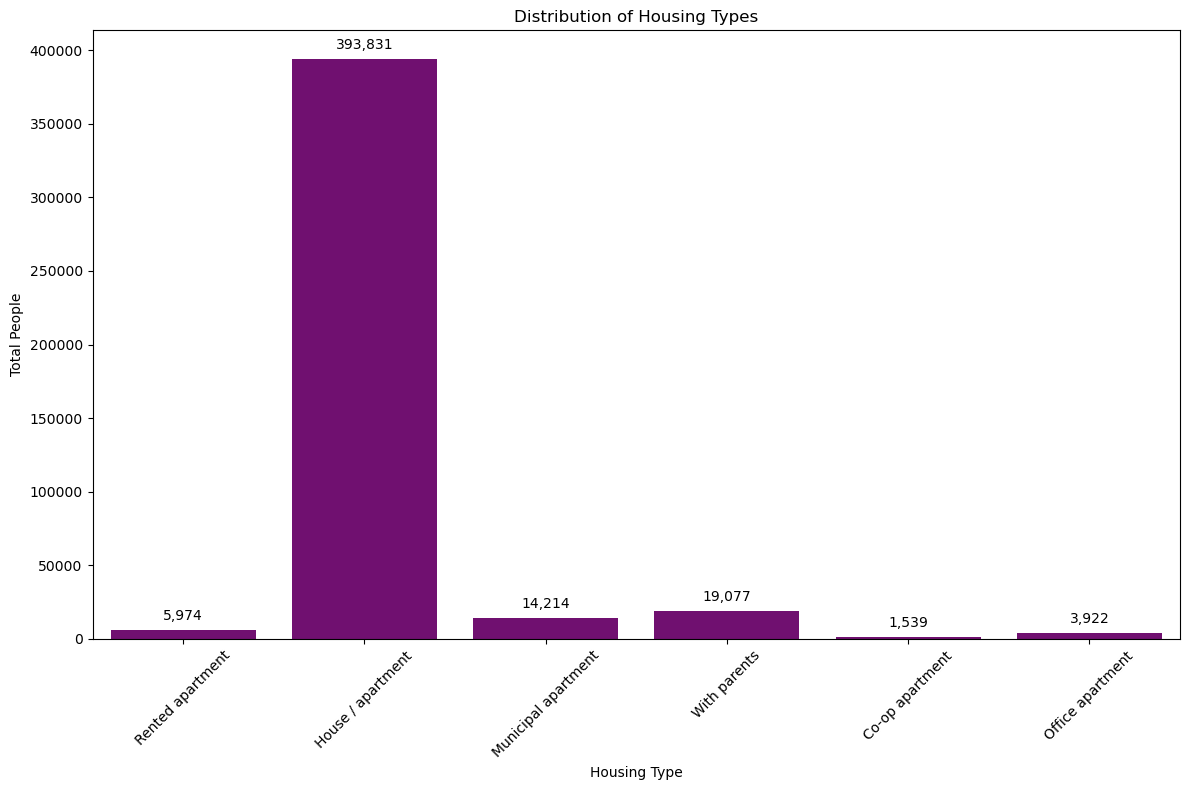

In [85]:
plt.figure(figsize=(12, 8))
housing_type_plot = sns.countplot(x='HOUSING_TYPE', data= application_data, color='purple')

plt.xlabel('Housing Type')
plt.ylabel('Total People')
plt.title('Distribution of Housing Types')
plt.xticks(rotation=45)

for p in housing_type_plot.patches:
    height = int(p.get_height())
    if height > 0:
        housing_type_plot.annotate(format(height, ',d'), 
                                   (p.get_x() + p.get_width() / 2., height), 
                                   ha='center', va='center', 
                                   xytext=(0, 10), 
                                   textcoords='offset points')

plt.tight_layout()
plt.show()

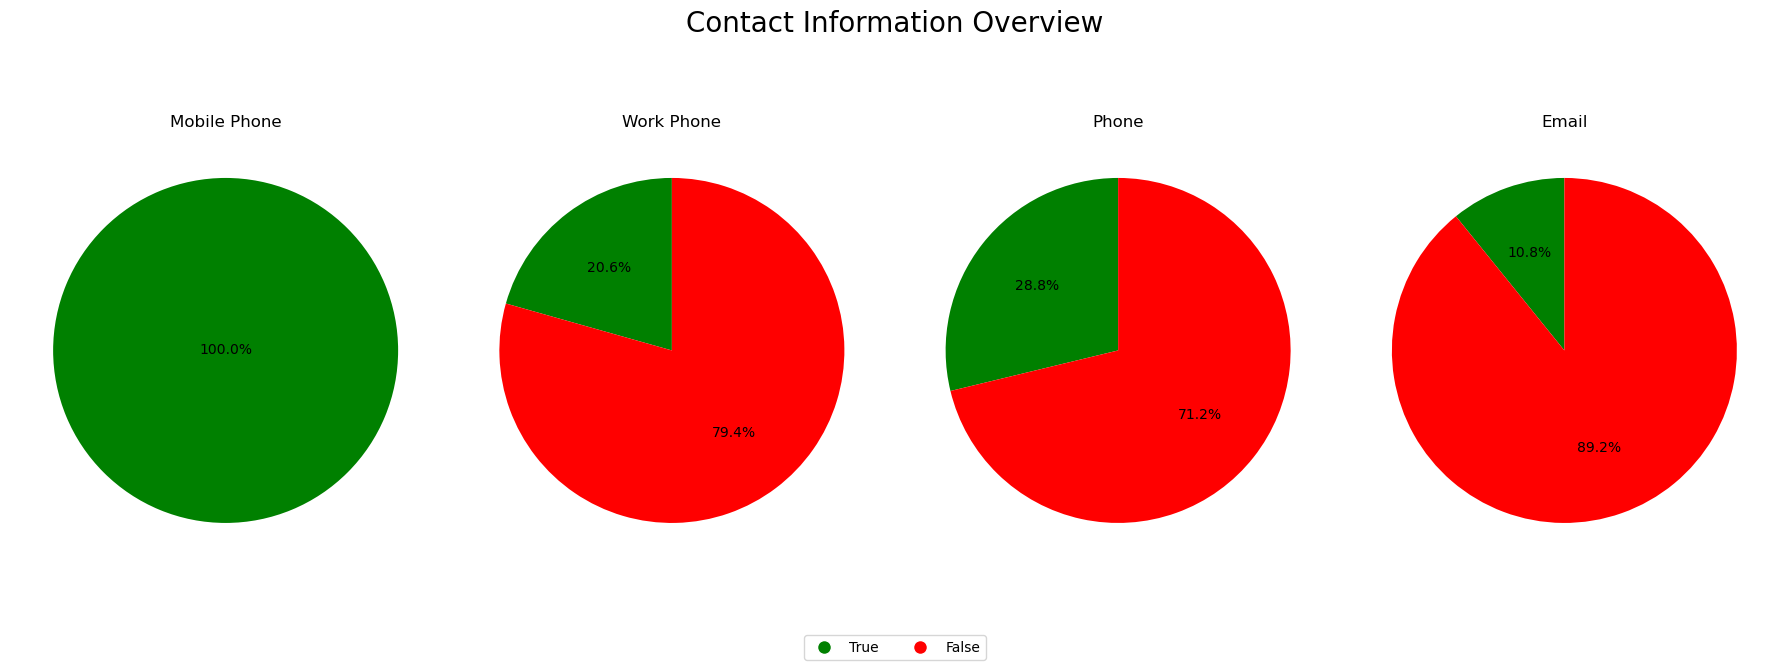

In [86]:
def plot_pie_chart(column, ax, title):
    sizes = application_data[column].value_counts().reindex([1, 0], fill_value = 0)
    colors=['green', 'red']
    labels = ['True', 'False']

    def autopct_format(pct):
        return ('%1.1f%%' % pct) if pct > 0 else ''
    
    wedges, texts, autotexts = ax.pie(sizes, autopct=autopct_format, startangle=90, colors=colors)

    if sizes[1] == sizes.sum():
        for autotext in autotexts:
            autotext.set_position((0, 0))
            autotext.set_verticalalignment('center')
            autotext.set_horizontalalignment('center')

    ax.set_title(title)

fig, axs = plt.subplots(1, 4, figsize=(18, 6))
fig.suptitle('Contact Information Overview', fontsize=20)

# Pie charts order 
plot_pie_chart('FLAG_MOBIL', axs[0], "Mobile Phone")
plot_pie_chart('WORK PHONE', axs[1], "Work Phone")
plot_pie_chart('PHONE', axs[2], "Phone")
plot_pie_chart('EMAIL', axs[3], "Email")

colors = ['green', 'red']
labels = ['True', 'False']
fig.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors], labels=labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)


plt.tight_layout()
plt.subplots_adjust(top=0.80)
plt.show()

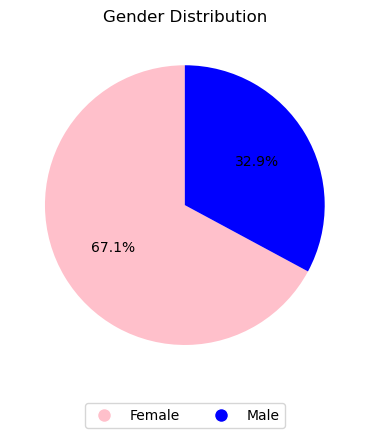

In [87]:
sizes = application_data["GENDER"].value_counts()
labels = ["Male" if label == "M" else "Female" for label in sizes.index]

color_map = {"M": 'blue', "F": 'pink'} 
colors = [color_map[label] for label in sizes.index]

def autopct_format(pct):
    return ('%1.1f%%' % pct) if pct > 0 else ''

fig, ax = plt.subplots(figsize=(6, 4))
wedges, texts, autotexts = ax.pie(sizes, autopct=autopct_format, startangle=90, colors=colors, labels=None)

ax.set_title("Gender Distribution")
fig.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors], labels=labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.tight_layout()
plt.show()

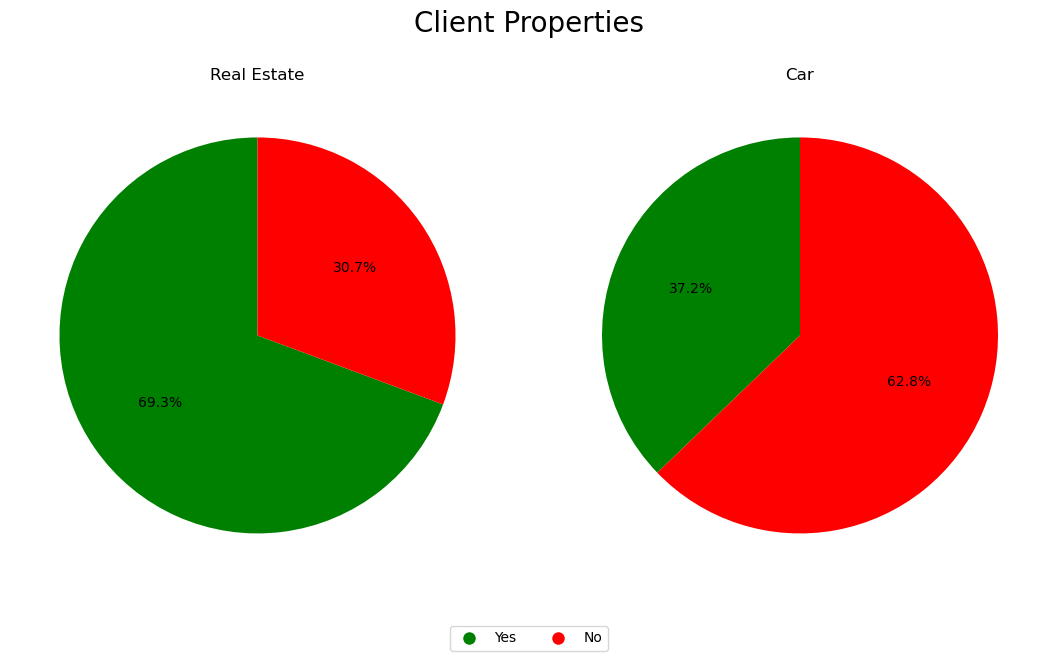

In [88]:
def plot_property_pie_chart(column, ax, title):
    sizes = application_data[column].value_counts().reindex(["Y", "N"], fill_value=0)
    colors = ['green', 'red']
    labels = ['Yes', 'No']

    def autopct_format(pct):
        return ('%1.1f%%' % pct) if pct > 0 else ''

    wedges, texts, autotexts = ax.pie(sizes, autopct=autopct_format, startangle=90, colors=colors, labels=None)
    
    ax.set_title(title)

fig, axs = plt.subplots(1, 2, figsize=(11, 6))
fig.suptitle('Client Properties', fontsize=20)

# Pie charts order
plot_property_pie_chart('REAL_STATE', axs[0], "Real Estate")
plot_property_pie_chart('CAR', axs[1], "Car")

colors = ['green', 'red']
labels = ['Yes', 'No']
fig.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors], labels=labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

In [89]:
merged_data.columns

Index(['ID', 'GENDER', 'CAR', 'REAL_STATE', 'CHILDREN', 'INCOME',
       'INCOME_TYPE', 'EDUCATION', 'MARTIAL_STATUS', 'HOUSING_TYPE', 'AGE',
       'YEARS EMPLOYED', 'FLAG_MOBIL', 'WORK PHONE', 'PHONE', 'EMAIL',
       'OCCUPATION_TYPE', 'FAMILY SIZE', 'MONTHS_BALANCE', 'STATUS'],
      dtype='object')

In [90]:
unique_application_ids = set(application_data["ID"].unique())
print("Unique Client ID in Application_Record: ", application_data["ID"].nunique())

unique_credit_ids = set(credit_record["ID"].unique())
print("Unique Client ID in Credit_Record: ", credit_record["ID"].nunique())

common_unique_ids = unique_application_ids.intersection(unique_credit_ids)
common_unique_id_count = len(common_unique_ids)

print ("The number of Unique IDS common in both data is: ", common_unique_id_count)

Unique Client ID in Application_Record:  438510
Unique Client ID in Credit_Record:  45985
The number of Unique IDS common in both data is:  36457


<h2>Classify the open month of the account</h2>

<h4>Current date will be 1-Jul-2024</h4>


In [91]:
from datetime import datetime

# Delete any ACCOUNT_OPEN_DATE Duplicates
if 'ACCOUNT_OPEN_DATE_x' in merged_data.columns or 'ACCOUNT_OPEN_DATE_y' in merged_data.columns or 'ACCOUNT_OPEN_DATE' in merged_data.columns:
    merged_data.drop(columns=['ACCOUNT_OPEN_DATE_x', 'ACCOUNT_OPEN_DATE_y', 'ACCOUNT_OPEN_DATE'], errors='ignore', inplace=True)

# Find the recent month for each ID
recent_month = merged_data.groupby('ID')['MONTHS_BALANCE'].max().reset_index()
current_date = datetime(2024, 7, 1)

recent_month['ACCOUNT_OPEN_DATE'] = recent_month['MONTHS_BALANCE'].apply(
    lambda x: current_date - pd.DateOffset(months=x)
)

recent_month['ACCOUNT_OPEN_DATE'] = recent_month['ACCOUNT_OPEN_DATE'].dt.strftime('%Y-%m')
merged_data = pd.merge(merged_data, recent_month[['ID', 'ACCOUNT_OPEN_DATE']], on='ID', how='left')

merged_data['ACCOUNT_OPEN_DATE'] = pd.to_datetime(merged_data['ACCOUNT_OPEN_DATE'], format='%Y-%m')

# Calculate the number of months since the account was opened
merged_data['MONTHS_SINCE_OPEN'] = ((current_date.year - merged_data['ACCOUNT_OPEN_DATE'].dt.year) * 12 
                                    + current_date.month - merged_data['ACCOUNT_OPEN_DATE'].dt.month)

merged_data['ACCOUNT_OPEN_DATE'] = merged_data['ACCOUNT_OPEN_DATE'].dt.strftime('%Y-%m')

merged_data.iloc[12:18]


,ID,GENDER,CAR,REAL_STATE,CHILDREN,INCOME,INCOME_TYPE,EDUCATION,MARTIAL_STATUS,HOUSING_TYPE,...,FLAG_MOBIL,WORK PHONE,PHONE,EMAIL,OCCUPATION_TYPE,FAMILY SIZE,MONTHS_BALANCE,STATUS,ACCOUNT_OPEN_DATE,MONTHS_SINCE_OPEN
12,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Unknown,2,12,C,2023-04,15
13,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Unknown,2,13,1,2023-04,15
14,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Unknown,2,14,0,2023-04,15
15,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Unknown,2,15,X,2023-04,15
16,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Unknown,2,0,C,2023-05,14
17,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Unknown,2,1,C,2023-05,14


<h2>Classify the Debts</h2>

In a bank, once a credit card is approved, the account is tracked over a period to check the performance of an account and also the overall portfolio health.

For building an application scorecard, we need a label variable that takes values (Good or Bad) for each of the accounts based on the credit status of the accounts at the end of a period.

For this analysis, the accounts which are overdue for a period of over 30 days are considered as Bad and others as Good.


In [92]:
def classify_credit_status(status):
    if status in ['C', 'X', '0']:
        return 'Good'
    else:
        return 'Bad'

merged_data['CREDIT_STATUS'] = merged_data['STATUS'].apply(classify_credit_status)


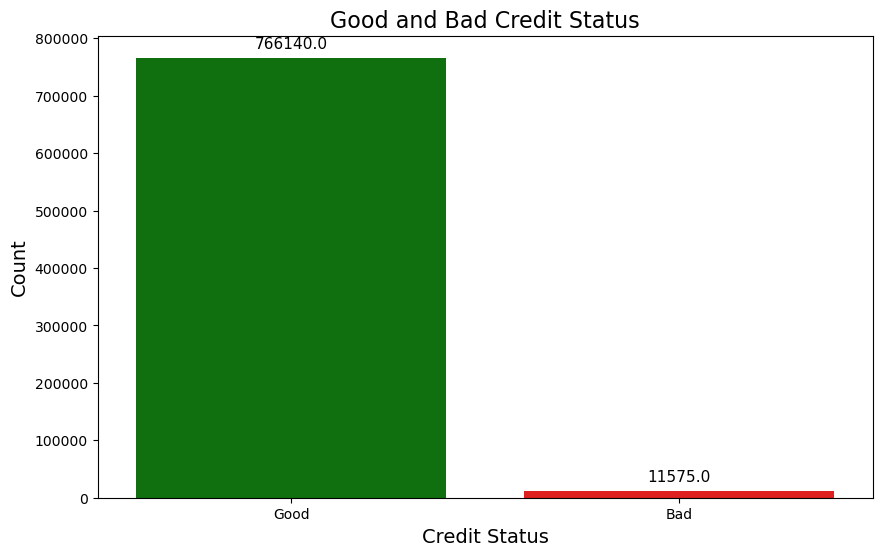

In [93]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CREDIT_STATUS', data=merged_data, palette=['green', 'red'])

plt.title('Good and Bad Credit Status', fontsize=16)
plt.xlabel('Credit Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 10), 
                       textcoords='offset points')

plt.show()

<h1>One hot encoding</h1>

In [94]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Convert categorical columns
categorical_columns = merged_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    merged_data[column] = label_encoder.fit_transform(merged_data[column])

print("Categorical columns after encoding in application data:")
merged_data.head()

Categorical columns after encoding in application data:


,ID,GENDER,CAR,REAL_STATE,CHILDREN,INCOME,INCOME_TYPE,EDUCATION,MARTIAL_STATUS,HOUSING_TYPE,...,WORK PHONE,PHONE,EMAIL,OCCUPATION_TYPE,FAMILY SIZE,MONTHS_BALANCE,STATUS,ACCOUNT_OPEN_DATE,MONTHS_SINCE_OPEN,CREDIT_STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,...,1,0,0,17,2,0,6,45,15,1
1,5008804,1,1,1,0,427500.0,4,1,0,4,...,1,0,0,17,2,1,6,45,15,1
2,5008804,1,1,1,0,427500.0,4,1,0,4,...,1,0,0,17,2,2,6,45,15,1
3,5008804,1,1,1,0,427500.0,4,1,0,4,...,1,0,0,17,2,3,6,45,15,1
4,5008804,1,1,1,0,427500.0,4,1,0,4,...,1,0,0,17,2,4,6,45,15,1


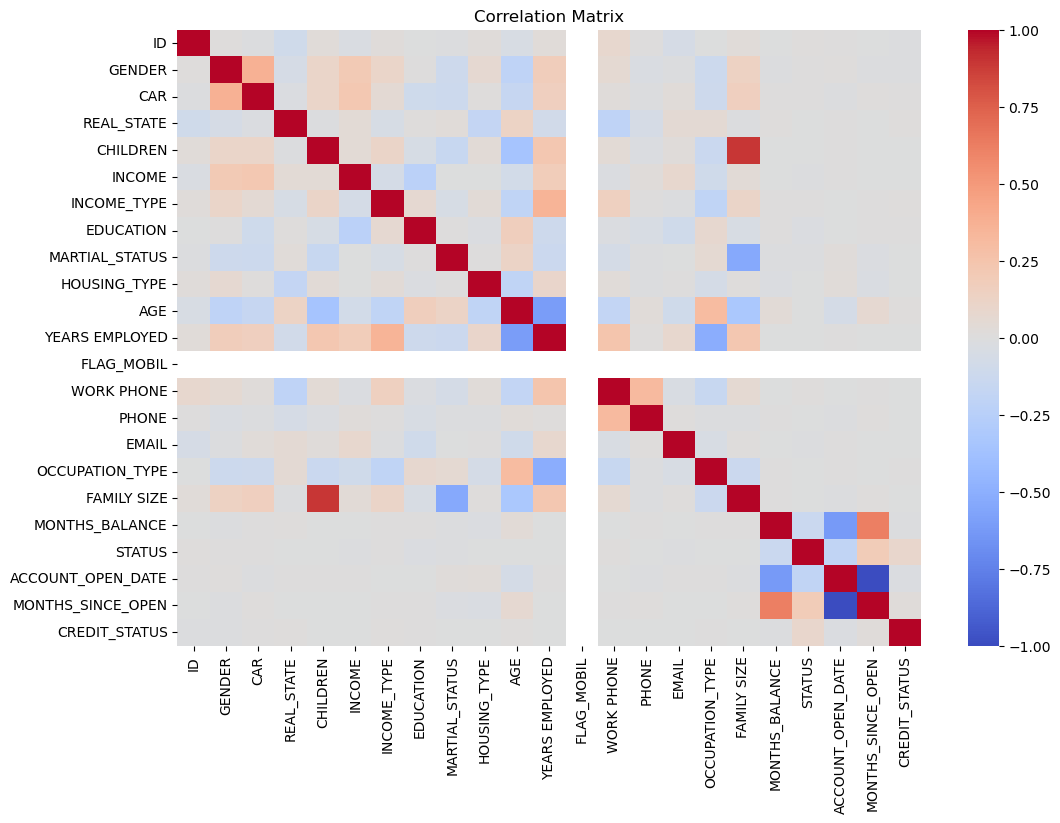

In [95]:
corr_matrix = merged_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot= False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [96]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 777715 non-null  int64  
 1   GENDER             777715 non-null  int32  
 2   CAR                777715 non-null  int32  
 3   REAL_STATE         777715 non-null  int32  
 4   CHILDREN           777715 non-null  int64  
 5   INCOME             777715 non-null  float64
 6   INCOME_TYPE        777715 non-null  int32  
 7   EDUCATION          777715 non-null  int32  
 8   MARTIAL_STATUS     777715 non-null  int32  
 9   HOUSING_TYPE       777715 non-null  int32  
 10  AGE                777715 non-null  float64
 11  YEARS EMPLOYED     777715 non-null  float64
 12  FLAG_MOBIL         777715 non-null  int64  
 13  WORK PHONE         777715 non-null  int64  
 14  PHONE              777715 non-null  int64  
 15  EMAIL              777715 non-null  int64  
 16  OC

<h1>Preprocessing</h1>

Handling outliers

In [97]:
columns_to_filter = ["INCOME", "FAMILY SIZE", "CHILDREN"]

lower_bound = merged_data[columns_to_filter].quantile(0.05)
upper_bound = merged_data[columns_to_filter].quantile(0.90)

iqr = (upper_bound - lower_bound)

lower_limits = lower_bound - 0.05 * iqr
upper_limits = upper_bound + 0.05 * iqr

filtered_data = merged_data[~((merged_data[columns_to_filter] < lower_limits) | (merged_data[columns_to_filter] > upper_limits)).any(axis=1)]

print(f'Original dataset size: {merged_data.shape}')
print(f'Filtered dataset size: {filtered_data.shape}')

Original dataset size: (777715, 23)
Filtered dataset size: (633273, 23)


In [98]:
merged_data = filtered_data

print(f'Original dataset size: {merged_data.shape}')
print(f'Filtered dataset size: {filtered_data.shape}')

Original dataset size: (633273, 23)
Filtered dataset size: (633273, 23)


In [99]:
merged_data.head()

,ID,GENDER,CAR,REAL_STATE,CHILDREN,INCOME,INCOME_TYPE,EDUCATION,MARTIAL_STATUS,HOUSING_TYPE,...,WORK PHONE,PHONE,EMAIL,OCCUPATION_TYPE,FAMILY SIZE,MONTHS_BALANCE,STATUS,ACCOUNT_OPEN_DATE,MONTHS_SINCE_OPEN,CREDIT_STATUS
31,5008806,1,1,1,0,112500.0,4,4,1,1,...,0,0,0,16,2,0,6,31,29,1
32,5008806,1,1,1,0,112500.0,4,4,1,1,...,0,0,0,16,2,1,6,31,29,1
33,5008806,1,1,1,0,112500.0,4,4,1,1,...,0,0,0,16,2,2,6,31,29,1
34,5008806,1,1,1,0,112500.0,4,4,1,1,...,0,0,0,16,2,3,6,31,29,1
35,5008806,1,1,1,0,112500.0,4,4,1,1,...,0,0,0,16,2,4,6,31,29,1


<H1>Model Building</h1>

In [100]:
from imblearn.over_sampling import SMOTE

features = ["MONTHS_SINCE_OPEN", "INCOME", "AGE", "INCOME_TYPE", "YEARS EMPLOYED", "CHILDREN", "FAMILY SIZE", "OCCUPATION_TYPE", "GENDER"]
target = "CREDIT_STATUS"


x = merged_data[features]
y = merged_data[target]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


<h2>Random Forest Classifier Model</h2>

Accuracy: 0.9095493257255951
Classification Report: 
               precision    recall  f1-score   support

           0       0.11      0.71      0.20      2924
           1       1.00      0.91      0.95    187058

    accuracy                           0.91    189982
   macro avg       0.55      0.81      0.57    189982
weighted avg       0.98      0.91      0.94    189982



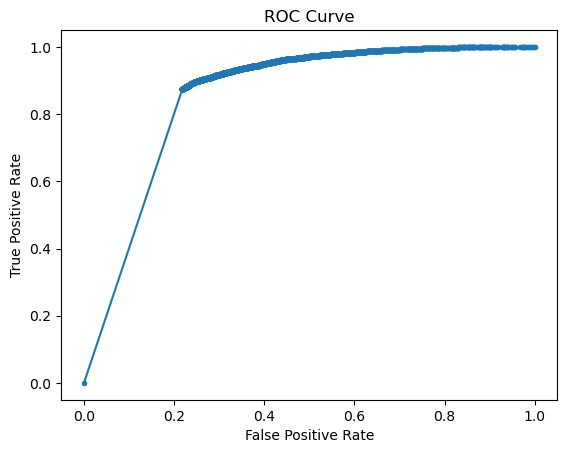

In [101]:
model = RandomForestClassifier(random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<h2>Random Forest Classifier Model with SMOTE</h2>

SMOTE Model Accuracy: 0.9433946373866998
SMOTE Model Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.61      0.25      2924
           1       0.99      0.95      0.97    187058

    accuracy                           0.94    189982
   macro avg       0.57      0.78      0.61    189982
weighted avg       0.98      0.94      0.96    189982



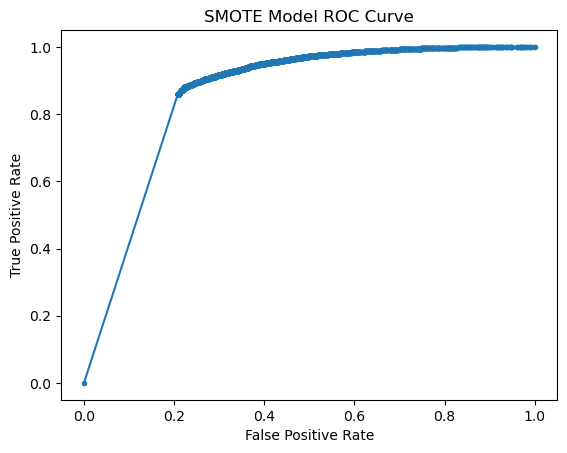

In [102]:
model_smote = RandomForestClassifier(random_state=42, class_weight="balanced")
model_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = model_smote.predict(X_test)
print('SMOTE Model Accuracy:', accuracy_score(y_test, y_pred_smote))
print('SMOTE Model Classification Report:\n', classification_report(y_test, y_pred_smote))

# ROC Curve for SMOTE model
y_prob_smote = model_smote.predict_proba(X_test)[:, 1]
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_prob_smote)
plt.plot(fpr_smote, tpr_smote, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SMOTE Model ROC Curve')
plt.show()

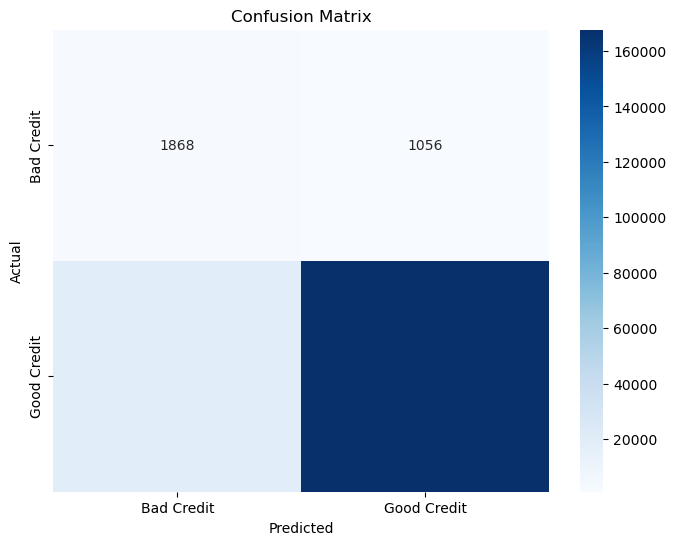

In [117]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad Credit', 'Good Credit'], yticklabels=['Bad Credit', 'Good Credit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h2>Logistic Regression Model</h2>

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

log_reg_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
log_reg_model.fit(X_train_smote, y_train_smote)

y_pred_log_reg = log_reg_model.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_log_reg))
print('Logistic Regression Classification Report:\n', classification_report(y_test, y_pred_log_reg))


c:\Users\52871\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.5723858049709972
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.02      0.45      0.03      2924
           1       0.99      0.57      0.73    187058

    accuracy                           0.57    189982
   macro avg       0.50      0.51      0.38    189982
weighted avg       0.97      0.57      0.71    189982



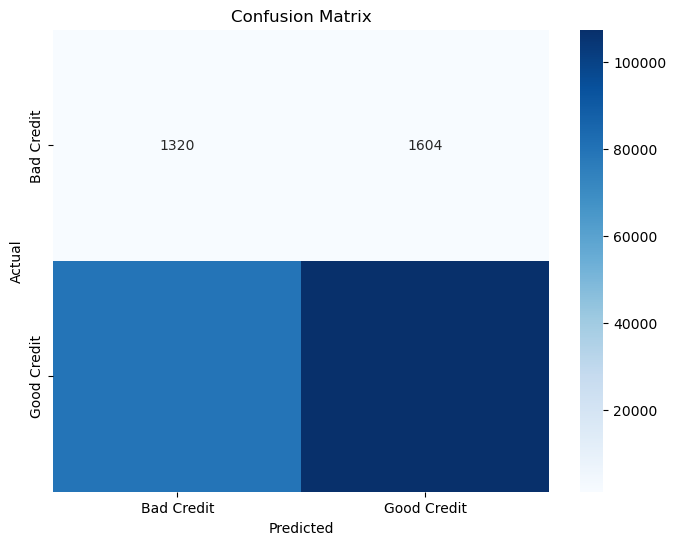

In [118]:
cm = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad Credit', 'Good Credit'], yticklabels=['Bad Credit', 'Good Credit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h2>Gradient Boosting Classifier Model</h2>

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
print('Gradient Boosting Accuracy:', accuracy_score(y_test, y_pred_gb))
print('Gradient Boosting Classification Report:\n', classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9846038045709593
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.00      0.00      2924
           1       0.98      1.00      0.99    187058

    accuracy                           0.98    189982
   macro avg       0.71      0.50      0.50    189982
weighted avg       0.98      0.98      0.98    189982



<h2>Gradient Boosting Classifier Model With SMOTE</h2>

Gradient Boosting with SMOTE Accuracy: 0.6964449263614447
Gradient Boosting with SMOTE Classification Report:
               precision    recall  f1-score   support

           0       0.03      0.55      0.05      2924
           1       0.99      0.70      0.82    187058

    accuracy                           0.70    189982
   macro avg       0.51      0.63      0.44    189982
weighted avg       0.98      0.70      0.81    189982



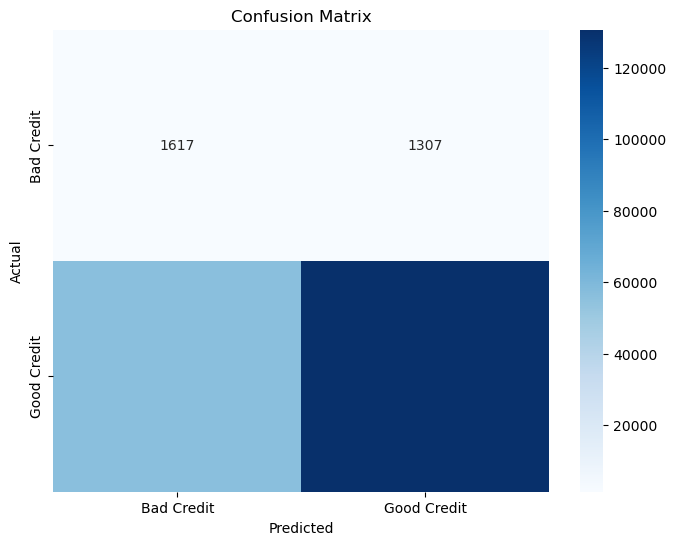

In [107]:
gb_model_smote = GradientBoostingClassifier(random_state=42)
gb_model_smote.fit(X_train_smote, y_train_smote)

y_pred_gb_smote = gb_model_smote.predict(X_test)
print('Gradient Boosting with SMOTE Accuracy:', accuracy_score(y_test, y_pred_gb_smote))
print('Gradient Boosting with SMOTE Classification Report:\n', classification_report(y_test, y_pred_gb_smote))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gb_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad Credit', 'Good Credit'], yticklabels=['Bad Credit', 'Good Credit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h2>XGBClassifier Model</h2>

In [108]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [6, 7, 8],
    'learning_rate': [0.2, 0.25, 0.3],
    'subsample': [0.5, 0.6, 0.7],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBClassifier(random_state=42)

grid_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=50, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')


best_xgb_model = XGBClassifier(**best_params, random_state=42)
best_xgb_model.fit(X_train, y_train)

y_pred = best_xgb_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.3, 'colsample_bytree': 1.0}
Best Score: 0.9856663004661392
Accuracy: 0.9855459990946511
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.12      0.21      2924
           1       0.99      1.00      0.99    187058

    accuracy                           0.99    189982
   macro avg       0.82      0.56      0.60    189982
weighted avg       0.98      0.99      0.98    189982



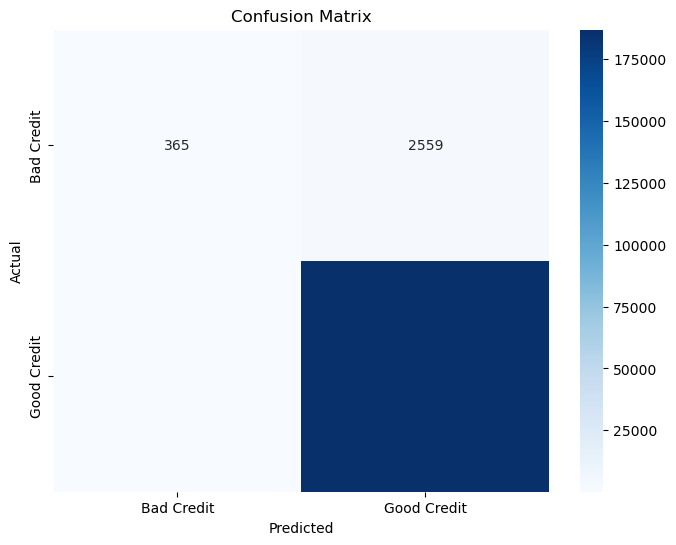

In [119]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad Credit', 'Good Credit'], yticklabels=['Bad Credit', 'Good Credit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h2>XGBClassifier Model using SMOTE</h2>

Accuracy: 0.9145708540809129
Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.65      0.19      2924
           1       0.99      0.92      0.95    187058

    accuracy                           0.91    189982
   macro avg       0.55      0.78      0.57    189982
weighted avg       0.98      0.91      0.94    189982



<Figure size 1200x800 with 0 Axes>

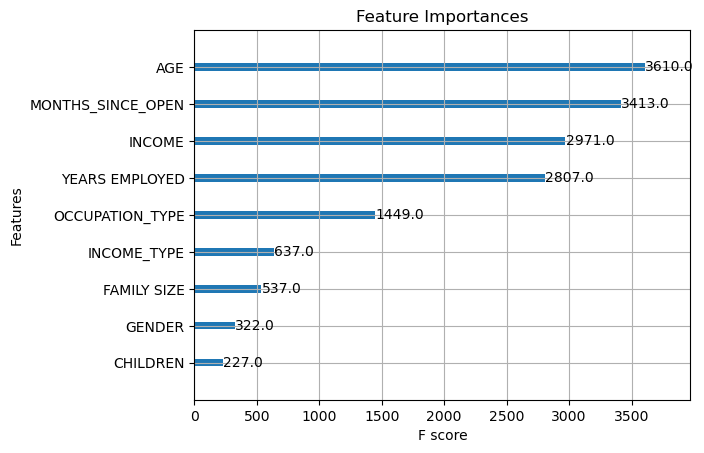

In [121]:
from imblearn.over_sampling import SMOTE
from xgboost import plot_importance
from xgboost import XGBClassifier

# Use the best parameters of gridsearch
xgb_model_smote = XGBClassifier(random_state=42, colsample_bytree=1.0, learning_rate=0.3, max_depth=6, n_estimators=300, subsample= 0.7)
xgb_model_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = xgb_model_smote.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_smote))
print('Classification Report:\n', classification_report(y_test, y_pred_smote))

# Visualize the feature importance
plt.figure(figsize=(12, 8))
plot_importance(xgb_model_smote, max_num_features=10)
plt.title('Feature Importances')
plt.show()

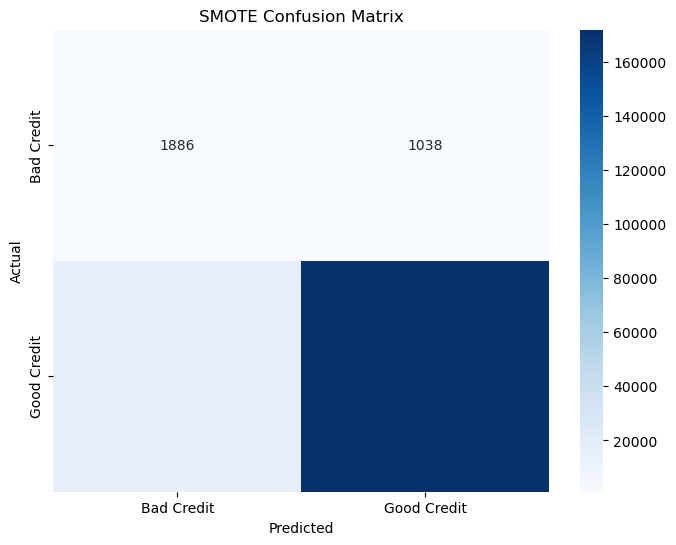

In [122]:
cm_smote = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad Credit', 'Good Credit'], yticklabels=['Bad Credit', 'Good Credit'],  annot_kws={"size": 10})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SMOTE Confusion Matrix')
plt.show()